In [2]:
# Decision Trees and Random Forest
# работает как ансамбль 
# по сути делит на группы исходя из логического деления по параметрам 
# деления на каждом сплите обычно происходит по заданным осям (
# значению одной из фич)

%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_578305/1484966113.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


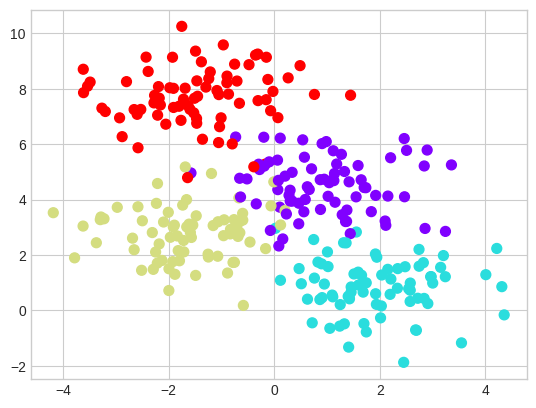

In [4]:
# Creating a Decision Tree 

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
random_state=0, cluster_std=1.0)
print(y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
# заметьте Х это вообще в принципе данные которые мы задаем 
# но это не X в смысле и Y для точки 
# это в смысле все данные входные - а y это данные выходные 
# и обычно y с шапкою - это данные предсказанные
# у нас тут задаются данные сгенерированные y в смысле на c= 
# то есть он как раз категорию и показывает для X данных 
# настоящую в смысле категорию - не предсказанную 


In [ ]:
# decision tree для разделения будет просто двигаться по осям последовательно 
# нарезая данные - пока они нарезаются по каждой из фич 

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

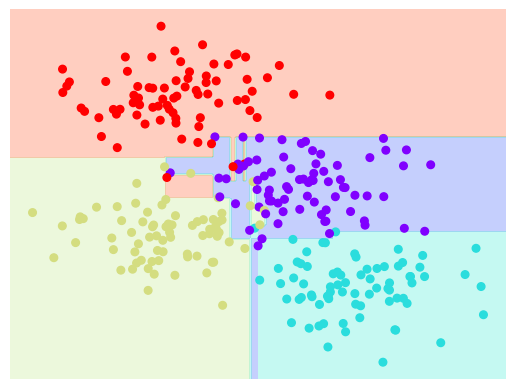

In [9]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
        clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
        np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
        levels=np.arange(n_classes + 1) - 0.5,
        cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(), X, y)

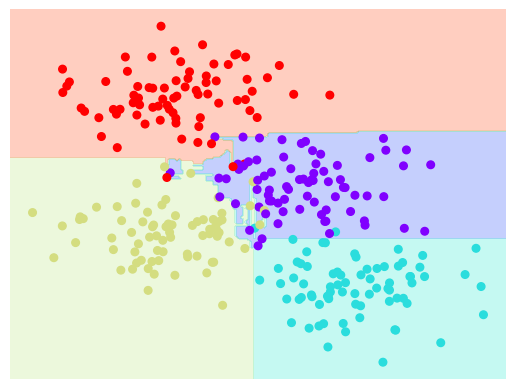

In [11]:
# Ensembles of Estimators: Random Forest 
# сам оверфиттинг видно на графике сверху - где забегание получается 
# какими то странными кусками (это собственно результаты деления)
# минимизировать это можно в случае деревьев - используя ансамбли делителей

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X,y)
visualize_classifier(bag, X,y)

# как видим мелкие сопли пропали - и график стал более кучным

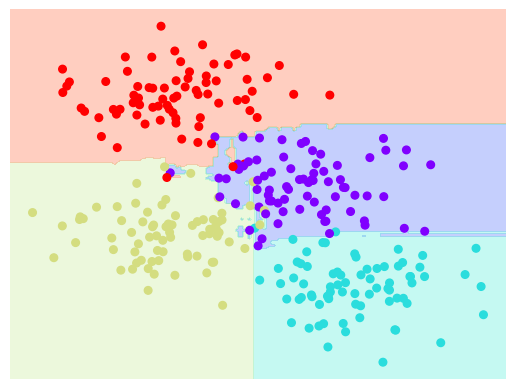

In [12]:
# все ансамбли вставлены уже по умолчанию в RandomForestClassifier
# в DecisionTreeClassifier используемом выше этого нет 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

# результат будет таким - же так как это по сути оно самое и есть 
# только DecisionTree уже в классификаторе находится


<ErrorbarContainer object of 3 artists>

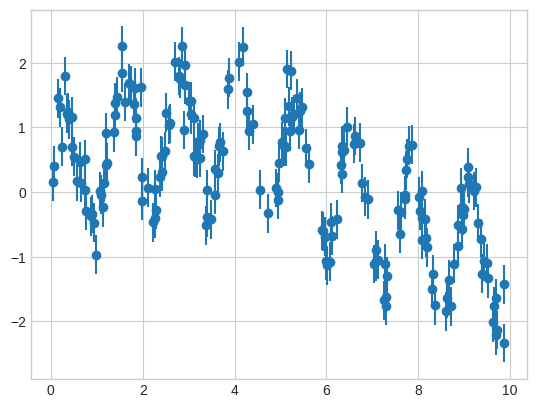

In [14]:
# Random Forest Regression 

rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise 

y = model(x)
plt.errorbar(x,y, 0.3, fmt="o")

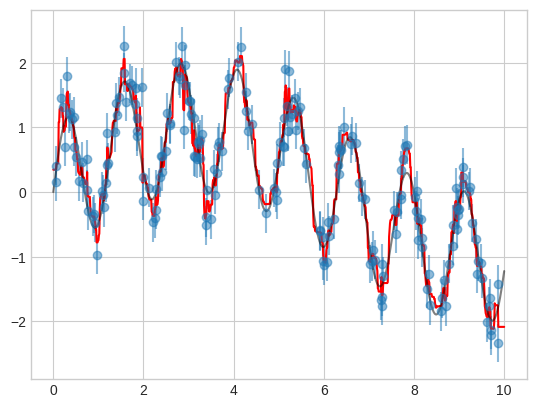

In [17]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:,None], y)

xfit = np.linspace(0,10,1000)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x,y,0.3, fmt="o", alpha=0.5)
plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, "-k", alpha=0.5);